In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import math
import numpy as np
from matplotlib.dates import datestr2num

In [2]:
results = pd.read_csv('entry_results.csv', header=0)

In [3]:
results

,time_of_run,BATCH_SIZE,TRAIN_SPLIT,NUM_FEATURES,NUM_UNITS,NUM_USERS,NUM_EPOCHS,EPSILON,DELTA,NORMCLIP,...,PRIVATIZER,train_a_loss,train_p_loss,u_estimate_acc,loc_estimate_error,test_a_loss,signal_map_error,distortion_error,loc_error,density_error
0,2019-05-10 11:07:47.931960,128,0.80,24,32,9,1,0.10,0.00001,4.000,...,noise_privatizer,0.030192,-2.268746e-03,98.437500,0.007395,0.055286,0.000000,0.000000e+00,0.000000e+00,0.000000
1,2019-05-10 11:13:53.632966,128,0.80,24,32,9,1,0.10,0.00001,4.000,...,noise_privatizer,0.102862,2.760143e-02,98.437500,0.008610,0.120330,0.001794,9.829476e-03,9.196847e-03,0.011963
2,2019-05-10 11:19:23.620552,128,0.80,24,32,9,1,0.10,0.00001,4.000,...,noise_privatizer,0.298617,2.244745e-01,96.093750,0.022377,0.111007,0.026050,3.918747e-02,3.704035e-02,1.665283
3,2019-05-10 11:24:34.964791,128,0.80,24,32,9,2,0.10,0.00001,4.000,...,noise_privatizer,0.118935,4.757190e-01,98.437500,0.017757,0.052582,0.054401,4.043729e-02,3.765385e-02,0.157471
4,2019-05-10 11:32:33.514346,128,0.80,24,32,9,1,0.10,0.00001,4.000,...,noise_privatizer,0.077902,2.059759e-01,94.531250,0.030251,0.137625,0.011566,4.001882e-02,3.805162e-02,0.211914
5,2019-05-10 11:35:43.055057,128,0.80,24,32,9,1,0.10,0.00001,4.000,...,noise_privatizer,0.192258,1.035250e+00,94.140625,0.038615,0.176787,0.025223,9.148374e-02,8.238000e-02,0.448486
6,2019-05-10 11:40:09.737286,128,0.80,24,32,9,3,0.10,0.00001,4.000,...,noise_privatizer,0.247322,2.155410e-01,93.359375,0.033617,0.173909,0.003776,8.787266e-02,8.951048e-02,0.233398
7,2019-05-10 11:55:59.763078,128,0.80,24,32,9,3,0.10,0.00001,4.000,...,noise_privatizer,0.364024,8.002430e-01,91.015625,0.046964,0.245128,0.110811,1.597189e-01,1.567052e-01,0.567871
8,2019-05-13 20:27:03.657289,128,0.80,24,32,9,1,0.10,0.00001,4.000,...,noise_privatizer,0.468337,6.845562e-01,89.062500,0.100681,0.311975,0.030074,2.399773e-01,2.446036e-01,0.618652
9,2019-05-13 20:30:29.593822,128,0.80,24,32,9,1,0.10,0.00001,4.000,...,noise_privatizer,0.568903,8.230353e-01,83.984375,0.116673,0.497042,0.011640,3.630596e-01,3.817819e-01,0.472656


In [40]:
results.iloc[-1]

time_of_run                                2019-05-24 10:29:29.678339
 BATCH_SIZE                                                       128
 TRAIN_SPLIT                                                      0.7
 NUM_FEATURES                                                      24
 NUM_UNITS                                                         32
 NUM_USERS                                                          9
 NUM_EPOCHS                                                         3
 EPSILON                                                         0.01
 DELTA                                                          1e-05
 NORMCLIP                                                           7
 SIGMA                                                              1
 RHO                                                                0
 w_map                                                              2
 w_distortion                                                       1
 w_distance         

In [26]:
noise_priv1 = results.values[np.where(results.values[:,22]==' noise_privatizer')]
noise_priv2 = results.values[-11:]

Text(0.5, 0.98, 'Noise Privatizer, Three Epochs of Training')

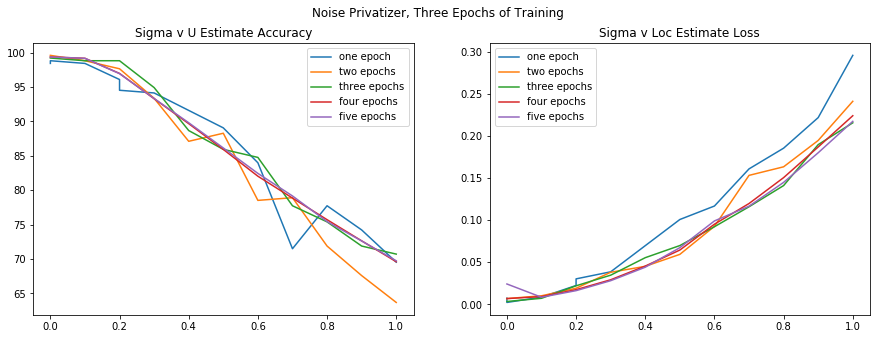

In [34]:
one_epoch = noise_priv1[np.where(noise_priv1[:,6]==1)]
one_epoch = one_epoch[np.where(one_epoch[:,2]==0.8)]
two_epoch = noise_priv1[np.where(noise_priv1[:,6]==2)][1:]
three_epoch = results.values[range(104,115)]
four_epoch=results.values[range(173,184)]
five_epoch = results.values[list(range(134,144))+[172]]
fig, ax = plt.subplots(1,2,figsize=(15,5))
for p in [one_epoch, two_epoch, three_epoch, four_epoch, five_epoch]:
    idx=np.argsort(p[:,10])
    ax[0].plot(p[idx][:,10], p[idx][:,25])
    ax[1].plot(p[idx][:,10], p[idx][:,26])
ax[0].set_title("Sigma v U Estimate Accuracy")
ax[0].legend(["one epoch", "two epochs", "three epochs","four epochs","five epochs"])
ax[1].set_title("Sigma v Loc Estimate Loss")
ax[1].legend(["one epoch", "two epochs", "three epochs","four epochs","five epochs"])
fig.suptitle("Noise Privatizer, Three Epochs of Training")

In [159]:
five_epoch[:,10]

array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.0], dtype=object)

Text(0.5, 1.0, 'Sigma v Utility Error, Three Epochs')

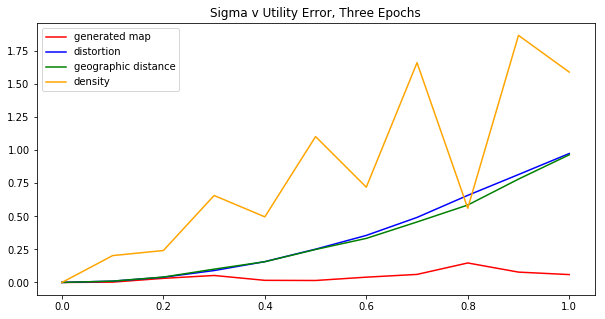

In [43]:
p = three_epoch
idx=np.argsort(p[:,10])

plt.figure(figsize=(10,5))
plt.plot(p[idx][:,10], p[idx][:,28],c='r')
plt.plot(p[idx][:,10], p[idx][:,29],c='b')
plt.plot(p[idx][:,10], p[idx][:,30],c='g')
plt.plot(p[idx][:,10], p[idx][:,31],c='orange')
plt.legend(["generated map","distortion","geographic distance","density"])
plt.title("Sigma v Utility Error, Three Epochs")

In [104]:
def analytical_gaussian_sigma(eta, epsilon, delta):
    def phi(x):
        return 1/2*(1+math.erf(x/math.sqrt(2)))
    delta_0 = phi(0)-math.e**epsilon*phi(-math.sqrt(2*epsilon))
    def Bplus(v):
        return phi(math.sqrt(epsilon*v))-math.e**epsilon*phi(-math.sqrt(epsilon*(v+2)))
    def Bminus(v):
        return phi(-math.sqrt(epsilon*v))-math.e**epsilon*phi(-math.sqrt(epsilon*(v+2)))
    if delta >= delta_0:
        print("here")
        vstar = 0
        while Bplus(vstar) <= delta:
            vstar += 1
            if vstar == 1000000:
                return 0
        if vstar == 0:
            print(0)
        alpha = math.sqrt(1+vstar/2)-math.sqrt(vstar/2)
    else:
        ustar = 0
        while Bminus(ustar) > delta:
            ustar += 1
        if ustar == 0:
            print(ustar)
        alpha = math.sqrt(1+ustar/2)+math.sqrt(ustar/2)
    sigma = alpha*eta/math.sqrt(2*epsilon)
    return sigma

Text(0.5, 1.0, 'Sigma as a function of epsilon, norm_clip=7.154 and delta=0.001')

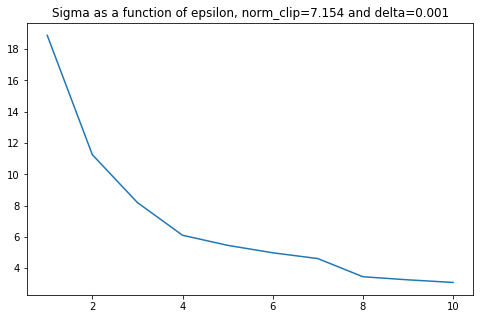

In [137]:
eta = 7.154
epsilon = np.array([1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0])
delta = 0.001
plt.figure(figsize=(8,5))
sigma = [analytical_gaussian_sigma(eta, eps, delta) for eps in epsilon]
plt.plot(epsilon, np.array(sigma))
plt.title("Sigma as a function of epsilon, norm_clip=7.154 and delta=0.001")

In [109]:
userID = {
'a841f74e620f74ec443b7a25d7569545':0,
'22223276ea84bbce3a62073c164391fd':1,
'510635002cb29804d54bff664cab52be':2,
'7cbc37da05801d46e7d80c3b99fd5adb':3,
'7023889b4439d2c02977ba152d6f4c6e':4,
'8425a81da55ec16b7f9f80c139c235a2':5,
'6882f6cf8c72d6324ba7e6bb42c9c7c2':6,
'1e33db5d2be36268b944359fbdbdad21':7,
'892d2c3aae6e51f23bf8666c2314b52f':8,
}

In [110]:
dataset = pd.read_csv('augmented_data.csv', header=0, usecols = [0,1]+list(range(2,21))+list(range(22,26)), 
                                          converters={0:lambda x: datestr2num(x), 1:lambda x: userID[x]})

In [12]:
dataset.corr(method='pearson')['iPhoneUID']

timestamp             0.328645
iPhoneUID             1.000000
dt1                  -0.006531
dt2                   0.168020
dt3                   0.153880
dt4                   0.170291
dt5                   0.155494
rssi                  0.451990
rssi1                 0.548773
rssi2                 0.548444
rssi3                 0.549092
rssi4                 0.550785
rssi5                 0.544151
latitude             -0.457103
longitude            -0.000910
finalLatitude        -0.009387
finalLongitude        0.001952
horizontalAccuracy   -0.072463
isMoving             -0.093964
txPower              -0.036515
cellID                0.214576
MNC                  -0.001060
ARFCN                 0.454076
freq_dlink            0.244991
freq_uplink           0.254113
Name: iPhoneUID, dtype: float64

In [19]:
dataset.corr(method='pearson')['latitude']

timestamp            -0.303622
iPhoneUID            -0.457103
dt1                   0.111851
dt2                   0.079271
dt3                   0.074349
dt4                   0.082687
dt5                   0.074024
rssi                 -0.162258
rssi1                -0.327051
rssi2                -0.326631
rssi3                -0.326605
rssi4                -0.328105
rssi5                -0.323064
latitude              1.000000
longitude             0.687900
finalLatitude         0.024374
finalLongitude        0.046419
horizontalAccuracy    0.489340
isMoving              0.054698
txPower               0.039819
cellID               -0.367070
MNC                   0.002183
ARFCN                -0.304342
freq_dlink           -0.163840
freq_uplink          -0.169962
Name: latitude, dtype: float64

In [62]:
dataset.corr(method='pearson')['rssi']

timestamp             0.096147
iPhoneUID             0.451990
dt1                   0.016681
dt2                   0.002925
dt3                   0.000209
dt4                   0.000517
dt5                   0.000461
rssi                  1.000000
rssi1                 0.716287
rssi2                 0.713678
rssi3                 0.712608
rssi4                 0.713553
rssi5                 0.708956
latitude             -0.162258
longitude             0.063282
finalLatitude         0.000107
finalLongitude        0.008495
horizontalAccuracy    0.091258
isMoving             -0.074341
txPower              -0.029014
cellID                0.193557
MNC                  -0.012540
ARFCN                 0.183890
freq_dlink            0.099956
freq_uplink           0.103635
Name: rssi, dtype: float64

In [ ]:
one_epoch = results.values[np.where(results.values[:,6]==1)]
two_epoch = results.values[np.where(results.values[:,6]==2)]

p = two_epoch
idx=np.argsort(p[:,10])
fig, ax = plt.subplots(1,2,figsize=(15,5))
ax[0].plot(p[idx][:,10], p[idx][:,25])
ax[1].plot(p[idx][:,10], p[idx][:,26])
ax[0].set_title("Sigma v U Estimate Accuracy")
ax[1].set_title("Sigma v Loc Estimate Loss")
fig.suptitle("Noise Privatizer, Two Epochs of Training")

In [4]:
# dp = results.values[np.where(results.values[:,22]==' dp_privatizer')]
dp = results.values[184:194]

Text(0.5, 0.98, 'Local DP Privatizer, delta=0.00001, norm_clip = 7.154')

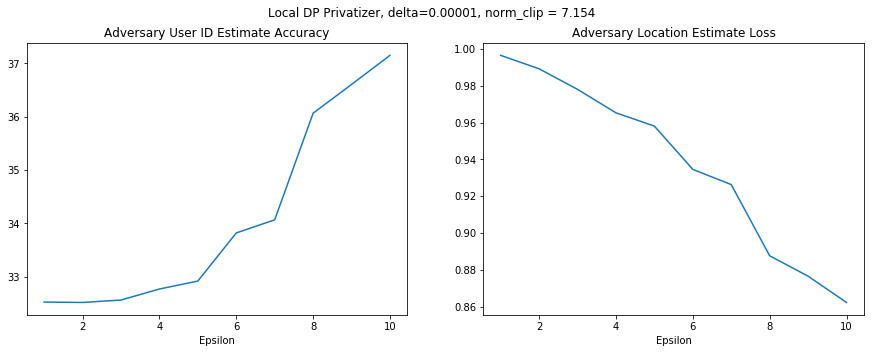

In [12]:
d4 = dp[np.where(dp[:,8]==0.00001)]
d3 = dp[np.where(dp[:,8]==0.0001)]
d2 = dp[np.where(dp[:,8]==0.001)]
d1 = dp[np.where(dp[:,8]==0.01)]
d0 = dp[np.where(dp[:,8]==0.1)]
do = dp[np.where(dp[:,8]==1.0)]

fig, ax = plt.subplots(1,2,figsize=(15,5))
# for p in [d4,d3,d2,d1,d0,do]:
d4 = d4[np.where(d4[:,7]<=0.1)]

for p in [dp]:
    idx=np.argsort(p[:,7])
    ax[0].plot(p[idx][:,7], p[idx][:,25])
    ax[1].plot(p[idx][:,7], p[idx][:,26])

# fig.legend(["delta = 0.00001","0.0001","0.001","0.01","0.1","1.0"])
ax[0].set_title("Adversary User ID Estimate Accuracy")
ax[1].set_title("Adversary Location Estimate Loss")
ax[0].set_xlabel("Epsilon")
ax[1].set_xlabel("Epsilon")
fig.suptitle("Local DP Privatizer, delta=0.00001, norm_clip = 7.154")

In [75]:
d4 = dp[np.where(dp[:,8]==0.00001)]
d4 = d4[np.where(d4[:,7]<=0.1)]

Text(0.5, 0.98, 'Utility - Local DP Privactizer, delta=0.00001')

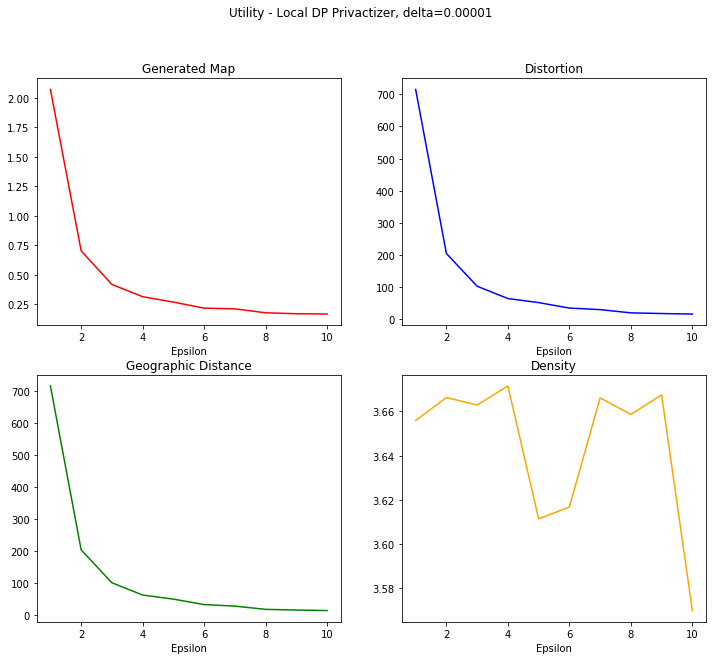

In [24]:
p = dp
idx=np.argsort(p[:,7])

fig, ax = plt.subplots(2,2,figsize=(12,10))
ax[0][0].plot(p[idx][:,7], p[idx][:,28],c='r')
ax[0][1].plot(p[idx][:,7], p[idx][:,29],c='b')
ax[1][0].plot(p[idx][:,7], p[idx][:,30],c='g')
ax[1][1].plot(p[idx][:,7], p[idx][:,31],c='orange')
ax[0][0].set_title("Generated Map")
ax[0][1].set_title("Distortion")
ax[1][0].set_title("Geographic Distance")
ax[1][1].set_title("Density")
ax[0][0].set_xlabel("Epsilon")
ax[0][1].set_xlabel("Epsilon")
ax[1][0].set_xlabel("Epsilon")
ax[1][1].set_xlabel("Epsilon")
fig.suptitle("Utility - Local DP Privactizer, delta=0.00001")

In [168]:
from scipy.interpolate import interp1d

In [166]:
sigma0 = results.values[np.where(results.values[:,10]==0.0)]
sigma0 = sigma0[np.where(sigma0[:,22]==' noise_privatizer')]
sigma0 = sigma0[np.where(sigma0[:,6]==1)]

sigma0 = results.values[range(144,157)]
sigma0 = results.values[range(157,170)]

Text(0.5, 1.0, 'Adversary Loss as a function of Training Portion')

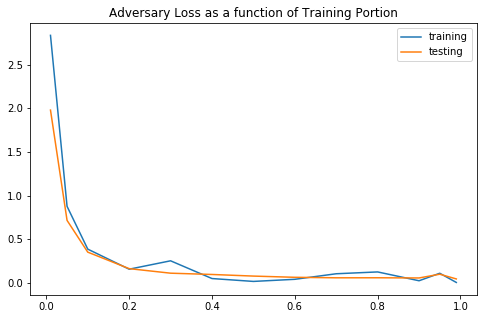

In [171]:
idx=np.argsort(sigma0[:,2])
plt.figure(figsize=(8,5))
plt.plot(sigma0[idx][:,2],sigma0[idx][:,23])
plt.plot(sigma0[idx][:,2],sigma0[idx][:,27])
plt.legend(["training","testing"])
plt.title("Adversary Loss as a function of Training Portion")

In [151]:
gap = results.iloc[range(115,129)].values

In [152]:
gap[:,11]

array([0.0, 0.001, 0.0015, 0.0025, 0.005, 0.01, 0.05, 0.1, 0.25, 0.5,
       0.75, 0.99, 0.9990000000000001, 1.0], dtype=object)

Text(0.5, 0.98, 'Gap Privatizer')

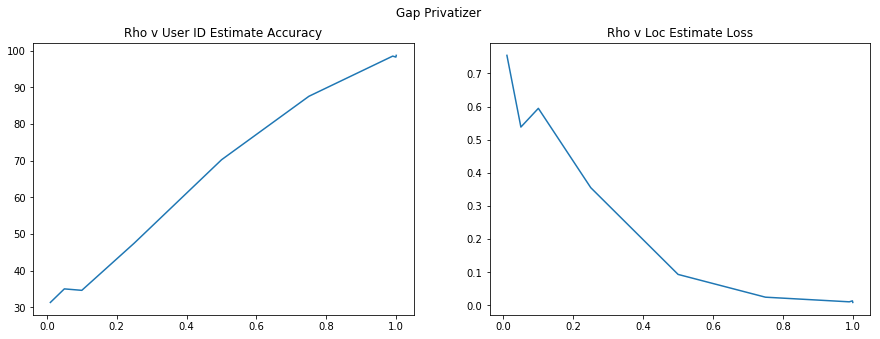

In [195]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
p = gap[5:]
idx=np.argsort(p[:,11])
ax[0].plot(p[idx][:,11], p[idx][:,25])
ax[1].plot(p[idx][:,11], p[idx][:,26])

# fig.legend(["delta = 0.00001","0.0001","0.001","0.01","0.1","1.0"])
ax[0].set_title("Rho v User ID Estimate Accuracy")
ax[1].set_title("Rho v Loc Estimate Loss")
fig.suptitle("Gap Privatizer")

Text(0.5, 0.98, 'GAP Privatizer, varying rho')

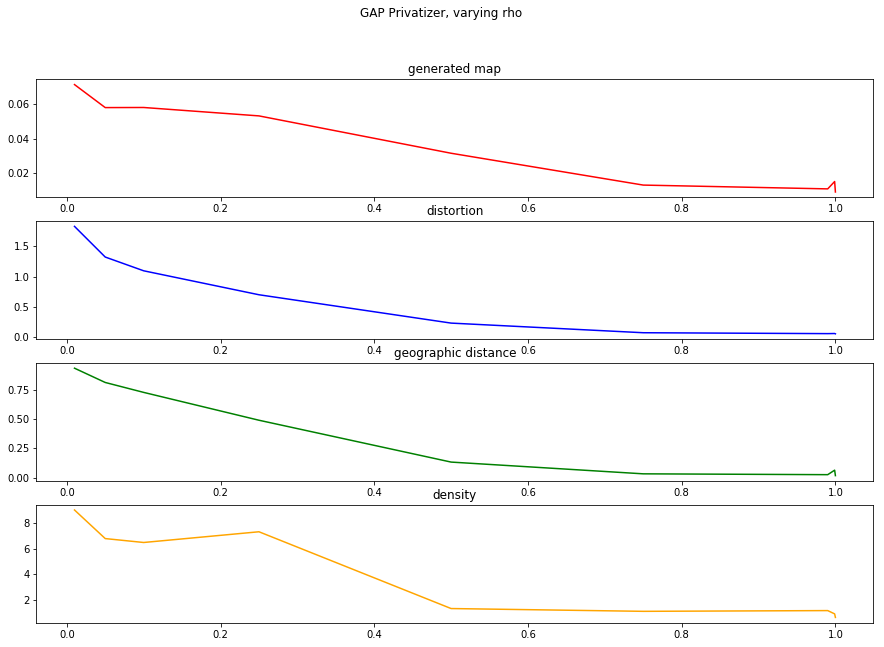

In [196]:
fig, ax = plt.subplots(4,1,figsize=(15,10))
ax[0].plot(p[idx][:,11], p[idx][:,28],c='r')
ax[1].plot(p[idx][:,11], p[idx][:,29],c='b')
ax[2].plot(p[idx][:,11], p[idx][:,30],c='g')
ax[3].plot(p[idx][:,11], p[idx][:,31],c='orange')
ax[0].set_title("generated map")
ax[1].set_title("distortion")
ax[2].set_title("geographic distance")
ax[3].set_title("density")
fig.suptitle("GAP Privatizer, varying rho")

In [197]:
p[:,11]

array([0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.99, 0.9990000000000001, 1.0],
      dtype=object)

In [4]:
daytabase_augmented_data = pd.read_csv('daytabase.csv')

In [7]:
daytabase_augmented_data.corr(method='pearson')

,0.000000000000000000e+00,7.347587514467592118e+05,1.020000000000000018e+00,1.020000000000000018e+00.1,1.020000000000000018e+00.2,1.020000000000000018e+00.3,1.020000000000000018e+00.4,-7.800000000000000000e+01,-7.900000000000000000e+01,-8.100000000000000000e+01,...,2.402806045499999854e+01.1,3.551558321830000153e+01.2,2.402806045499999854e+01.2,8.381999999999999318e+01,0.000000000000000000e+00.139,-2.550000000000000000e+02.133,6.056200000000000000e+04.104,7.870000000000000000e+02.114,1.860200000000000045e+03.114,1.765200000000000045e+03.114
0.000000000000000000e+00,1.000000,0.000009,0.036005,0.057616,0.005772,0.073388,0.064663,-0.013032,-0.060686,-0.059059,...,-0.001102,0.007418,-0.002156,-0.021297,0.008317,0.033934,0.007262,-0.028614,-0.028614,-0.028614
7.347587514467592118e+05,0.000009,1.000000,-0.158511,-0.024985,-0.005935,-0.051680,-0.032019,0.107302,0.099971,0.094969,...,-0.050557,-0.230892,-0.050997,-0.103634,-0.157085,-0.028379,-0.156675,-0.092740,-0.092740,-0.092740
1.020000000000000018e+00,0.036005,-0.158511,1.000000,0.218833,0.103153,0.527968,0.168568,-0.038218,-0.062958,-0.067984,...,0.034862,0.083609,0.034574,0.134507,-0.022711,-0.008642,0.005054,0.041601,0.041601,0.041601
1.020000000000000018e+00.1,0.057616,-0.024985,0.218833,1.000000,0.333047,0.717647,0.795735,0.052515,0.010115,0.036226,...,0.103923,0.009275,0.104148,0.162410,-0.022114,-0.023588,-0.055709,0.054724,0.054724,0.054724
1.020000000000000018e+00.2,0.005772,-0.005935,0.103153,0.333047,1.000000,0.246370,0.271680,0.000479,-0.017535,-0.016319,...,0.014688,-0.004514,0.014641,0.037657,-0.020142,-0.005197,-0.016679,0.027069,0.027069,0.027069
1.020000000000000018e+00.3,0.073388,-0.051680,0.527968,0.717647,0.246370,1.000000,0.721410,0.040647,0.000125,-0.002196,...,0.060157,0.029025,0.060139,0.121416,-0.026150,-0.026836,-0.014479,0.068914,0.068914,0.068914
1.020000000000000018e+00.4,0.064663,-0.032019,0.168568,0.795735,0.271680,0.721410,1.000000,0.054992,-0.000379,0.000898,...,0.082649,0.029054,0.082501,0.128493,-0.021428,-0.007969,-0.052883,0.032954,0.032954,0.032954
-7.800000000000000000e+01,-0.013032,0.107302,-0.038218,0.052515,0.000479,0.040647,0.054992,1.000000,0.822519,0.817751,...,0.123846,0.042686,0.124356,0.103277,-0.022329,-0.027302,-0.155670,-0.069508,-0.069508,-0.069508
-7.900000000000000000e+01,-0.060686,0.099971,-0.062958,0.010115,-0.017535,0.000125,-0.000379,0.822519,1.000000,0.991298,...,0.103638,0.026350,0.104303,0.038881,0.002944,-0.053422,-0.128963,-0.006912,-0.006912,-0.006912
-8.100000000000000000e+01,-0.059059,0.094969,-0.067984,0.036226,-0.016319,-0.002196,0.000898,0.817751,0.991298,1.000000,...,0.106609,0.021847,0.107276,0.046137,0.002588,-0.050475,-0.125575,-0.004513,-0.004513,-0.004513


In [23]:
label_corr = daytabase_augmented_data.corr(method='pearson')['0.000000000000000000e+00']

In [28]:
np.where(label_corr>0.1)

(array([   0, 2167]),)

In [33]:
(2167-1)%23

4

Text(0.5, 1.0, 'Sigma v Utility Error, averaged over 2 runs')

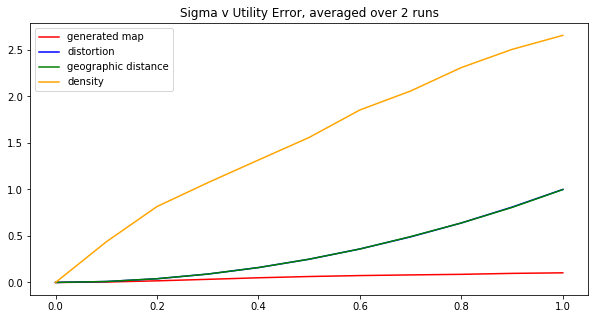

In [102]:
plt.figure(figsize=(10,5))
siigs = np.array([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
gmap = np.array([0.0, 0.0045015180100781895, 0.017415563444142402, 0.03340647832608811, 0.05018039575703409, 
                0.06375125878154575, 0.07396029055520148, 0.08095018117156315, 0.08727470705471561, 0.09747918017657968, 0.10338454652916])
dist = np.array([0.0, 0.010000238946414126, 0.03994425165111439, 0.08986929646288254, 0.16004353474607266, 
                0.24986801833594466, 0.3600397666331787, 0.49006593137777943, 0.6393827423059862, 0.8102031401500885, 0.9996858446989755])
geo = np.array([0.0, 0.009988958791522446, 0.03992548238037208, 0.09022043998679992, 0.15992757956183676, 
               0.2501358720622911, 0.35971374449245486, 0.4927055940424023, 0.6395416110570458, 0.8064934437276687, 0.9984381337923782])
dens = np.array([0.0, 0.43680780052681994, 0.8160250725874042, 1.0718563854465997, 1.3163926866319444,
                1.5589024335488506, 1.8543532799030173, 2.0580848898467434, 2.3100263222880746, 2.5054342335668105, 2.6560381308369254])
plt.plot(siigs, gmap,c='r')
plt.plot(siigs, dist,c='b')
plt.plot(siigs, geo,c='g')
plt.plot(siigs, dens,c='orange')
plt.legend(["generated map","distortion","geographic distance","density"])
plt.title("Sigma v Utility Error, averaged over 2 runs")

In [112]:
dataset.values

array([[7.34758749e+05, 0.00000000e+00, 1.02000000e+00, ...,
        7.87000000e+02, 1.86020000e+03, 1.76520000e+03],
       [7.34758749e+05, 0.00000000e+00, 1.02000000e+00, ...,
        7.87000000e+02, 1.86020000e+03, 1.76520000e+03],
       [7.34758750e+05, 0.00000000e+00, 1.03000000e+00, ...,
        7.87000000e+02, 1.86020000e+03, 1.76520000e+03],
       ...,
       [7.34969598e+05, 0.00000000e+00, 1.02000000e+00, ...,
        7.94000000e+02, 1.86160000e+03, 1.76660000e+03],
       [7.34969598e+05, 7.00000000e+00, 1.02000000e+00, ...,
        8.79000000e+02, 1.87860000e+03, 1.78360000e+03],
       [7.34969598e+05, 8.00000000e+00, 1.02000000e+00, ...,
        8.79000000e+02, 1.87860000e+03, 1.78360000e+03]])

In [113]:
print(np.linalg.norm(dataset.values[0]))

737255.7320657292


In [117]:
len(dataset.values)

445419

In [133]:
def dp_count(dataset,clip):
    count = 0
    for row in range(len(dataset.values)):
        if np.random.random() > 0.5:
            if np.linalg.norm(dataset.values[row]) >= clip:
                count += 1
        elif np.random.random() < 0.5:
            count += 1
    real_count = .25*count
    return 100*real_count/len(dataset.values)

Trace Adversary

SIGMA =  0.75
Adversary Accuracy: 34.375
Adversary Loss: 1.554202883025669
Sigmal Map: 0.010585547393535975
Distortion: 0.5615939056165226
Geographic Distortion: 0.5552565688403501

SIGMA =  0.75
Adversary Accuracy: 40.625
Adversary Loss: 1.5272658922194675
Sigmal Map: 0.01795038650262015
Distortion: 0.569884939918935
Geographic Distortion: 0.5640739124094594

In [47]:
s = [0,0.01,0.05,0.1,0.25,0.5,0.75,1.0]
# acc = [96.875, 93.75, 87.5, 78.125, 65.625, 56.25, 34.375, 28.125]
# m = [0.0,4.249e-08,9.083e-06,5.921e-05,0.0033,0.0105,0.01058,0.0310]
# d = [0.0,0.0001,0.0025,0.0098,0.0618,0.2461,0.5615,0.9947]
# gd = [0, 0.0001,0.00245,0.0100,0.0629,0.2475,0.55525,0.9974]

acc = [96.875, 93.75, 87.5, 78.125, 65.625, 56.25, 40.625, 28.125]
m = [0.0,4.249e-08,9.083e-06,5.921e-05,0.0033,0.0105,0.017950,0.0310]
d = [0.0,0.0001,0.0025,0.0098,0.0618,0.2461,0.56988,0.9947]
gd = [0, 0.0001,0.00245,0.0100,0.0629,0.2475,0.564073,0.9974]

Text(0.5, 0.98, 'Performance when noise added to day-long trace')

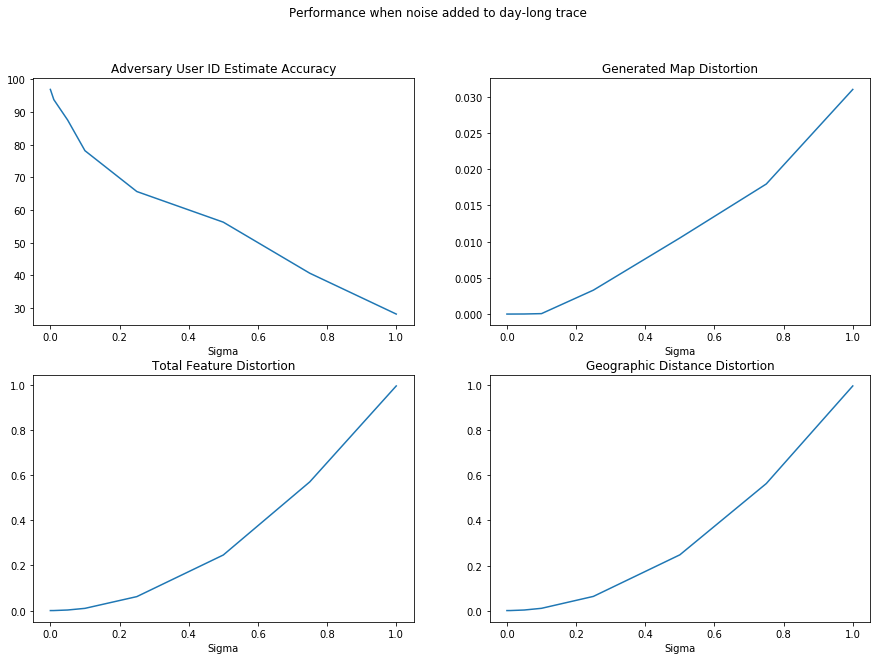

In [48]:
fig, ax = plt.subplots(2,2,figsize=(15,10))
ax[0][0].plot(s,acc)
ax[0][0].set_xlabel("Sigma")
ax[0][0].set_title("Adversary User ID Estimate Accuracy")
ax[0][1].plot(s,m)
ax[0][1].set_xlabel("Sigma")
ax[0][1].set_title("Generated Map Distortion")
ax[1][0].plot(s,d)
ax[1][0].set_xlabel("Sigma")
ax[1][0].set_title("Total Feature Distortion")
ax[1][1].plot(s,gd)
ax[1][1].set_xlabel("Sigma")
ax[1][1].set_title("Geographic Distance Distortion")
fig.suptitle("Performance when noise added to day-long trace")

In [90]:
cd = [1,5,10,20,30,40,50]
acc = [32.124880153403645, 32.42075143815916, 32.32712128475551, 32.139860977948224, 32.4244966442953, 32.466442953020135, 32.46269774688399]
uhat = [0.9934871612781616, 1.0029753592125163, 1.0003289046381922, 1.0017286834458847, 1.0113729811625183, 0.99989180125669, 0.9957540299815312]
m = [0.061282828402444124, 0.065828787200406, 0.08211569588841931, 0.07882704559707403, 0.07163881708078373, 0.07321056772600242, 0.08141195458078973]
d = [3.6114289800659565, 2.2416576221581344, 3.5774732166345538, 2.2649667937696885, 2.351138360531693, 2.0763661767192065, 2.240261641707391]
gd = [2.283478412049139, 2.430064894310374, 2.39242968069225, 2.360396530254833, 2.351138360531693, 2.394109807887872, 2.332232950333288]
dens = [13.961886637222666, 15.847983494811277, 14.815323273432737, 15.333010505558939, 15.413612079498018, 14.587432867557466, 15.311412168026218]

Text(0.5, 0.98, 'Codebook Heuristic Privacy Performance')

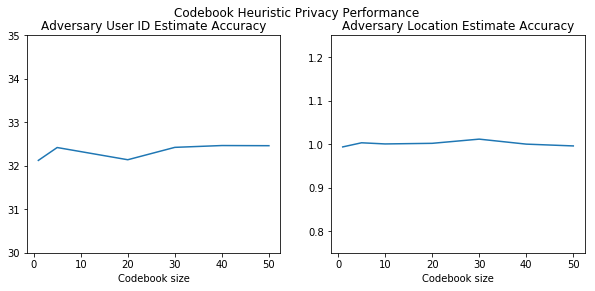

In [91]:
fig, ax = plt.subplots(1,2,figsize=(10,4))
ax[0].plot(cd, acc)
ax[0].set_ylim(30,35)
ax[0].set_xlabel("Codebook size")
ax[0].set_title("Adversary User ID Estimate Accuracy")
ax[1].plot(cd,uhat)
ax[1].set_ylim(0.75,1.25)
ax[1].set_xlabel("Codebook size")
ax[1].set_title("Adversary Location Estimate Accuracy")
fig.suptitle("Codebook Heuristic Privacy Performance")

Text(0.5, 0.98, 'Codebook Heuristic Privacy Performance')

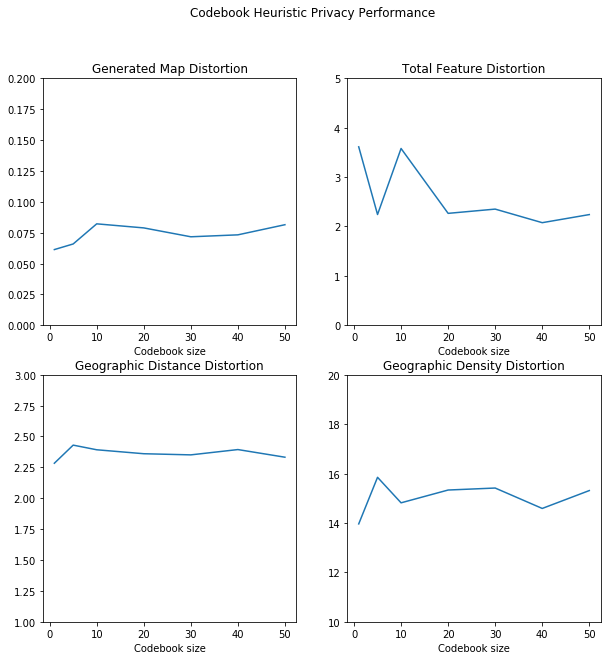

In [94]:
fig, ax = plt.subplots(2,2,figsize=(10,10))
ax[0][0].plot(cd, m)
ax[0][0].set_ylim(0,0.2)
ax[0][0].set_xlabel("Codebook size")
ax[0][0].set_title("Generated Map Distortion")
ax[0][1].plot(cd,d)
ax[0][1].set_ylim(0,5)
ax[0][1].set_xlabel("Codebook size")
ax[0][1].set_title("Total Feature Distortion")
ax[1][0].plot(cd, gd)
ax[1][0].set_ylim(1,3)
ax[1][0].set_xlabel("Codebook size")
ax[1][0].set_title("Geographic Distance Distortion")
ax[1][1].plot(cd,dens)
ax[1][1].set_ylim(10,20)
ax[1][1].set_xlabel("Codebook size")
ax[1][1].set_title("Geographic Density Distortion")
fig.suptitle("Codebook Heuristic Privacy Performance")